In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('911.csv')

# Dataset Link: https://www.kaggle.com/datasets/mchirico/montcoalert

In [3]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [4]:
df.shape

(663522, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
#Finding the null values

df.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [7]:
# Top 3 Zip Codes are for most calls

df['zip'].value_counts().head(3)

zip
19401.0    45606
19464.0    43910
19403.0    34888
Name: count, dtype: int64

In [8]:
# How many unique value here?

len(df['title'].unique())  # or nunique 

148

In [9]:
# Creating a new column

x = df['title'].iloc[0]

In [10]:
x

'EMS: BACK PAINS/INJURY'

In [11]:
x.split(':')[0]

'EMS'

In [12]:
# Spliting Text from title column and creating a new column

df['Reason'] = df['title'].apply(lambda title:title.split(':')[0])

In [13]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire


In [14]:
# most common reason for calling 911

df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

Text(0.5, 1.0, 'Which Problem Has Most Calls')

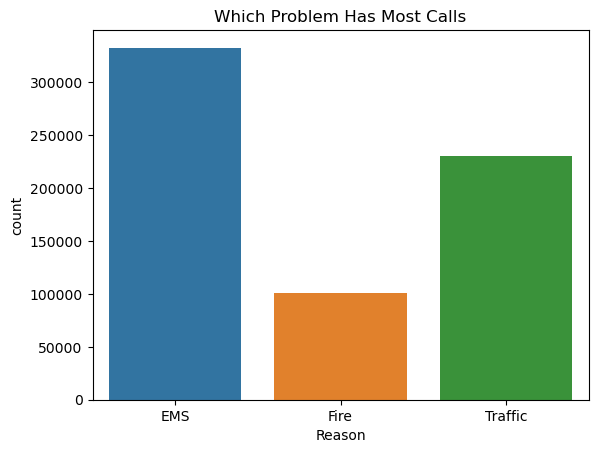

In [15]:
# Which Problem Has Most Calls

sns.countplot(x = 'Reason', data = df)
plt.title('Which Problem Has Most Calls')

In [16]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
 9   Reason     663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 50.6+ MB


In [19]:
t = df['timeStamp'].iloc[150]

In [20]:
t

Timestamp('2015-12-11 06:23:57')

In [21]:
df['Hour'] = df['timeStamp'].apply(lambda t:t.hour)

In [22]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17


In [23]:
df['Month'] = df['timeStamp'].apply(lambda t:t.month)

In [24]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12


In [25]:
df['Day of Week'] = df['timeStamp'].apply(lambda t:t.day_of_week)

In [26]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3


In [27]:
dmap = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

In [28]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday


Text(0.5, 1.0, 'Which week days has most calls?')

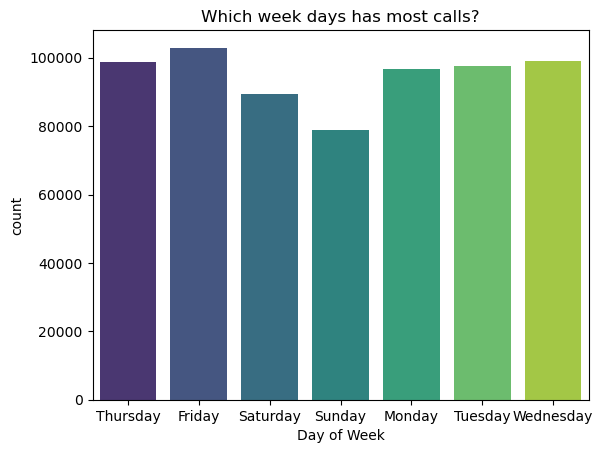

In [30]:
# Which week days has most calls?

sns.countplot(x = 'Day of Week', data = df, palette = 'viridis')
plt.title('Which week days has most calls?')

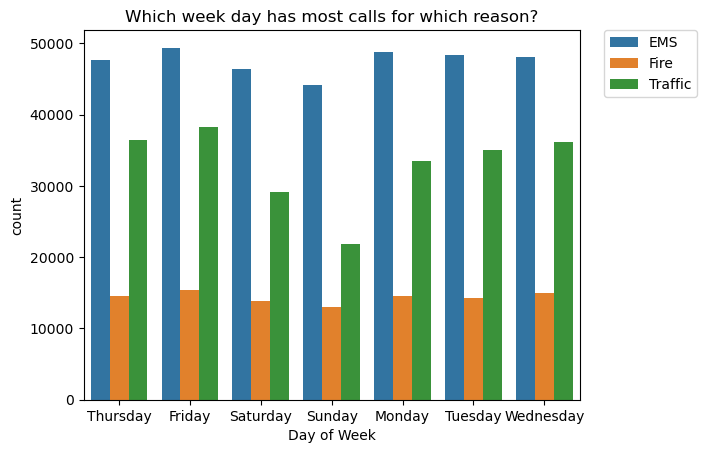

In [31]:
# Which week day has most calls for which reason?

sns.countplot(x = 'Day of Week', data = df, hue = 'Reason')
plt.title('Which week day has most calls for which reason?')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

Text(0.5, 1.0, 'Which month has most calls?')

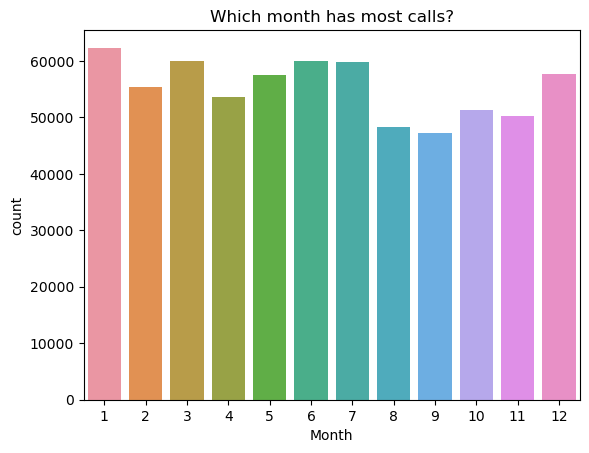

In [32]:
# Which month has most calls?

sns.countplot(x = 'Month', data = df)
plt.title('Which month has most calls?')

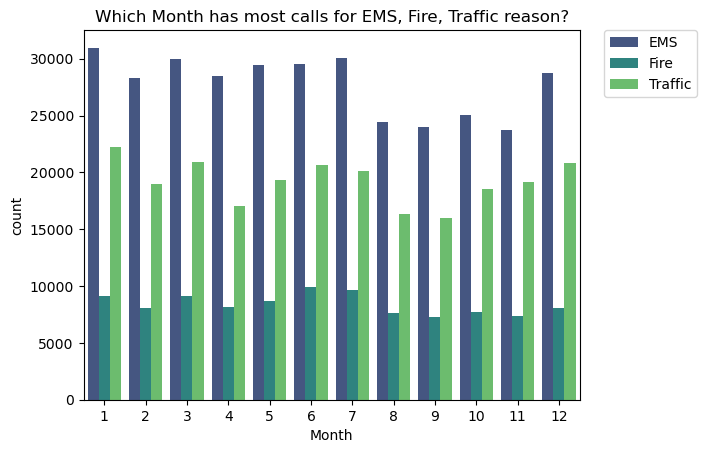

In [33]:
# Which Month has most calls for EMS, Fire, Traffic reason?

sns.countplot(x = 'Month', data = df, hue = 'Reason', palette = 'viridis')
plt.title('Which Month has most calls for EMS, Fire, Traffic reason?')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

In [34]:
t.date()

datetime.date(2015, 12, 11)

In [35]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [36]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday,2015-12-10


In [37]:
t.time()

datetime.time(6, 23, 57)

In [38]:
df['Time'] = df['timeStamp'].apply(lambda t:t.time())

In [39]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date,Time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10,17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10,17:29:21


In [40]:
df['Date'].value_counts()

Date
2018-03-02    2187
2018-11-15    1662
2020-06-03    1401
2018-03-07     920
2018-03-03     917
              ... 
2020-07-29     217
2020-03-29     204
2020-03-28     184
2016-05-01     136
2015-12-10     114
Name: count, Length: 1694, dtype: int64

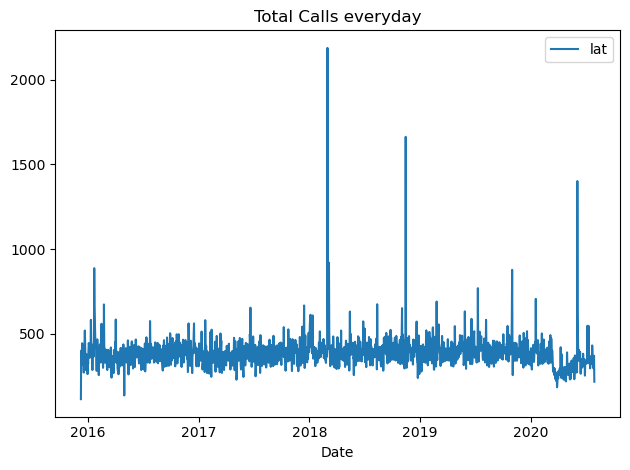

In [41]:
# Total Calls everyday

df.groupby('Date').count() [['lat']].plot()
plt.title('Total Calls everyday')
plt.tight_layout()

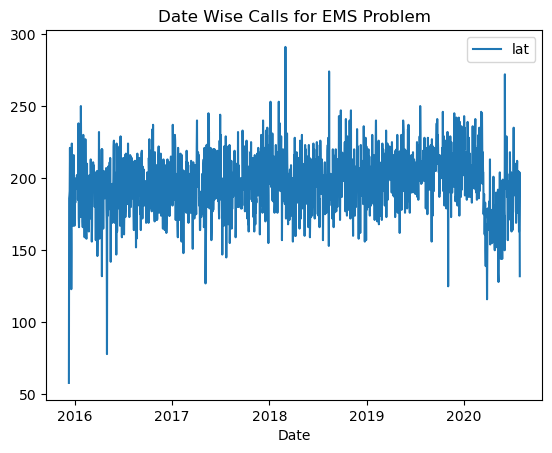

In [42]:
# Date Wise Calls for EMS Problem

df[df['Reason'] == 'EMS'].groupby('Date').count() [['lat']].plot()
plt.title('Date Wise Calls for EMS Problem')
plt.tight_layout
plt.show()

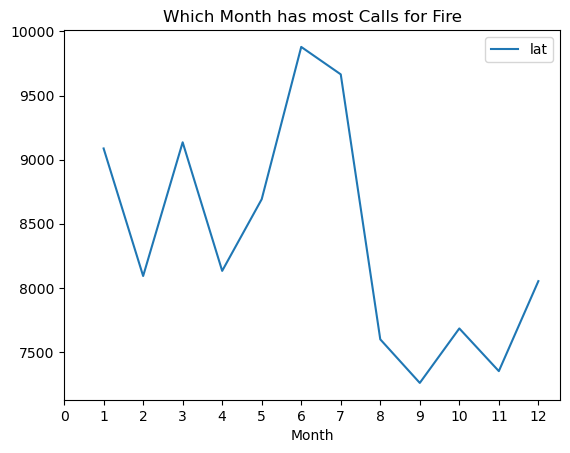

In [43]:
 # Which Month has most Calls for Fire

df[df['Reason'] == 'Fire'].groupby('Month').count() [['lat']].plot()
plt.title('Which Month has most Calls for Fire')
plt.xticks(range(0,13,1))
plt.tight_layout
plt.show()

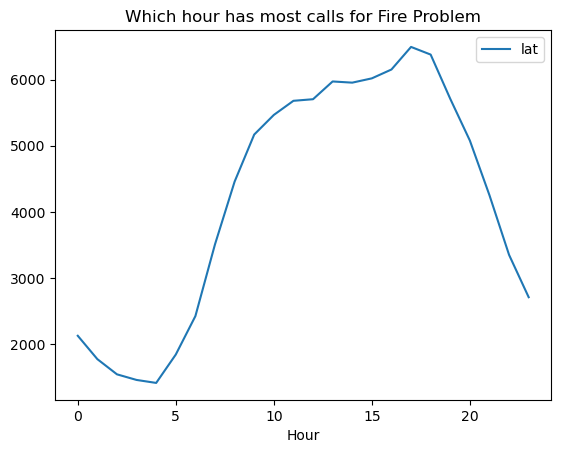

In [44]:
# Which hour has most calls for Fire Problem

df[df['Reason'] == 'Fire'].groupby('Hour').count() [['lat']].plot()
plt.title('Which hour has most calls for Fire Problem')
plt.tight_layout
plt.show()

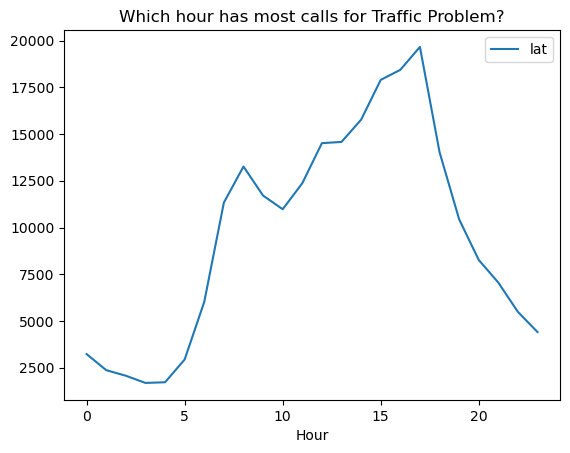

In [45]:
# Which hour has most calls for Traffic Problem?

df[df['Reason'] == 'Traffic'].groupby('Hour').count() [['lat']].plot()
plt.title('Which hour has most calls for Traffic Problem?')
plt.tight_layout
plt.show()

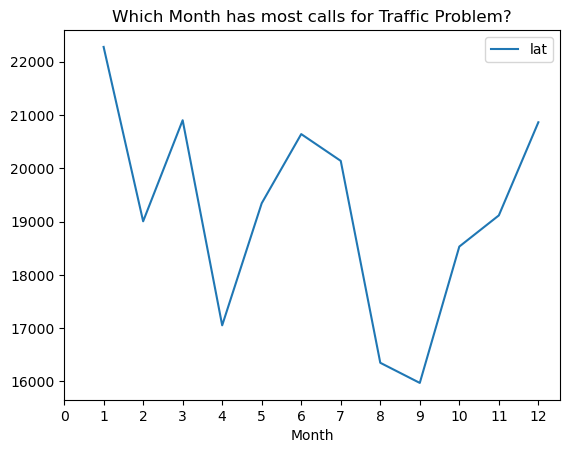

In [46]:
# Which Month has most calls for Traffic Problem?

df[df['Reason'] == 'Traffic'].groupby('Month').count() [['lat']].plot()
plt.title('Which Month has most calls for Traffic Problem?')
plt.tight_layout
plt.xticks(range(0,13,1))
plt.show()

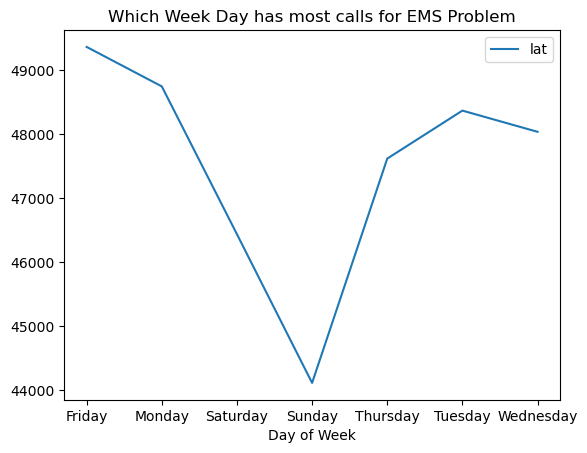

In [47]:
# Which Week Day has most calls for EMS Problem

df[df['Reason'] == 'EMS'].groupby('Day of Week').count() [['lat']].plot()
plt.title('Which Week Day has most calls for EMS Problem')
plt.tight_layout
plt.show()

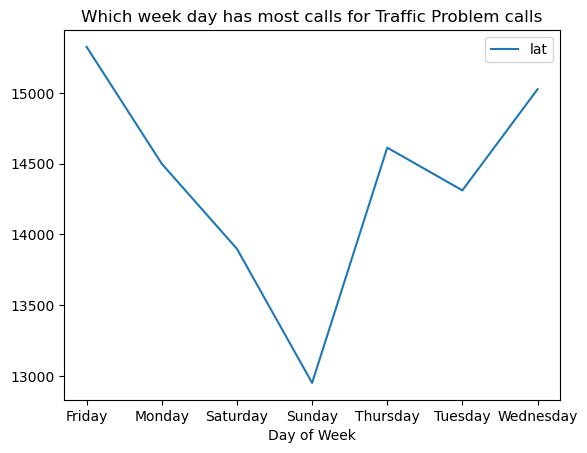

In [48]:
# Which week day has most calls for Traffic Problem calls

df[df['Reason'] == 'Fire'].groupby('Day of Week').count() [['lat']].plot()
plt.title('Which week day has most calls for Traffic Problem calls')
plt.tight_layout
plt.show()

In [49]:
# Restructuring DataFrame 
# 1. Hour Become Column, 2. Day of Week become Row

# What amount of calls for on an hourly basis every day of the week?

dayhour = df.groupby(by = ['Day of Week','Hour']).count() ['Reason'].unstack()

In [50]:
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


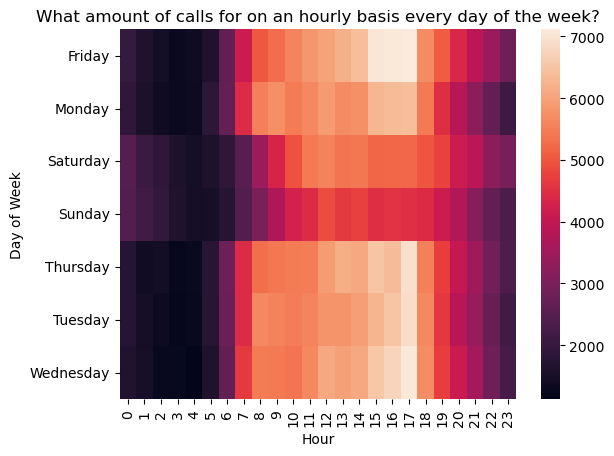

In [51]:
# Creating a heatmap using this DataFrame

sns.heatmap(dayhour)
plt.title('What amount of calls for on an hourly basis every day of the week?')
plt.show()